In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
advertising = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advertising.drop(columns=['Unnamed: 0'], inplace=True, axis=1)


In [4]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

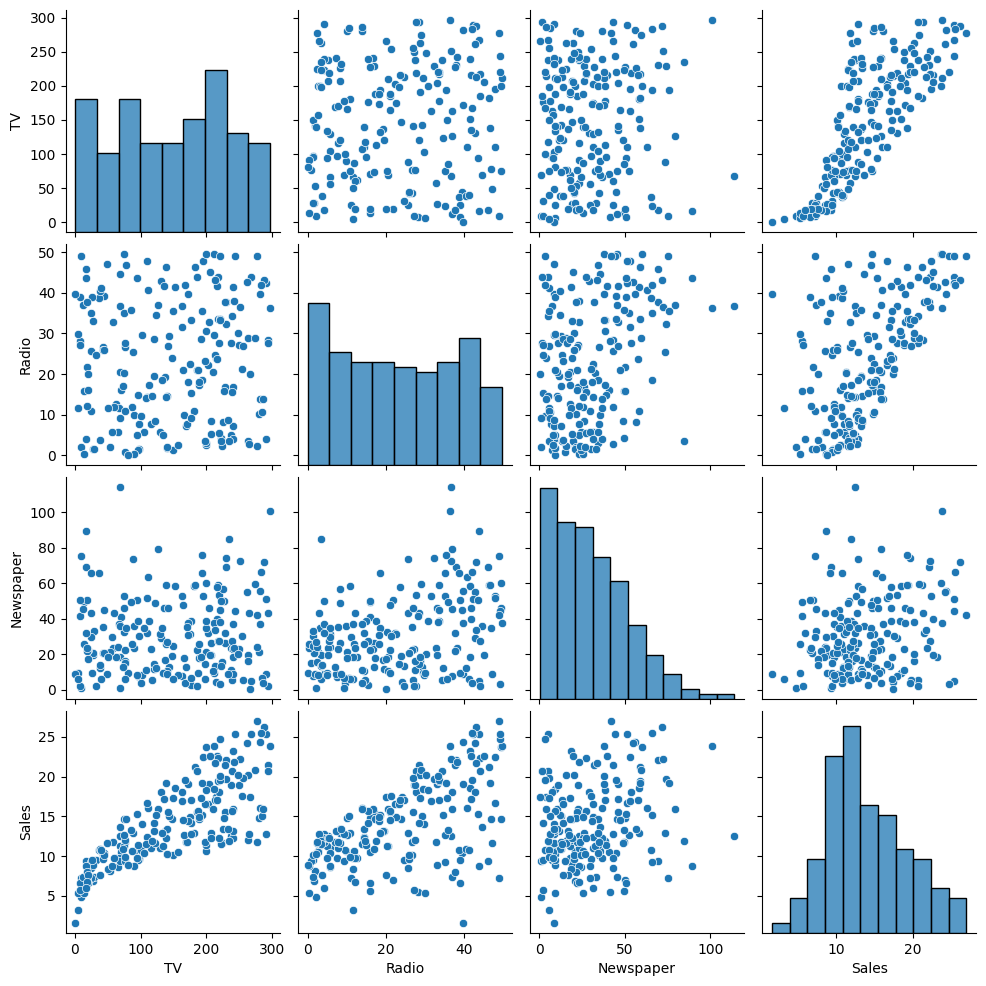

In [7]:
sns.pairplot(advertising)
plt.show()

In [8]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


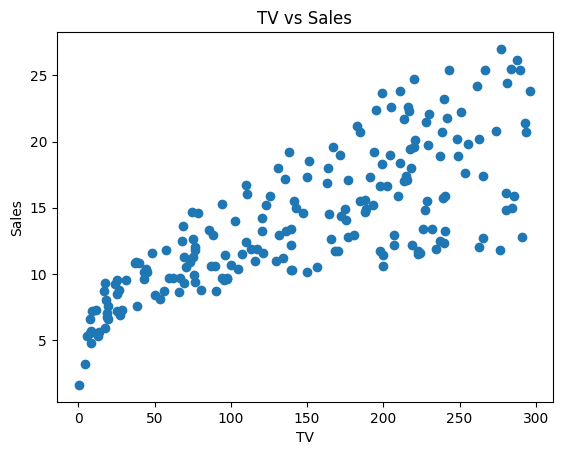

In [9]:
plt.scatter(advertising.TV, advertising.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

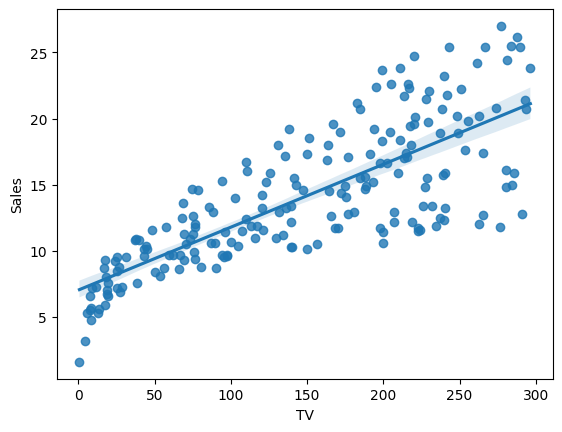

In [10]:
sns.regplot(x='TV', y='Sales', data=advertising)

<Axes: xlabel='Radio', ylabel='Sales'>

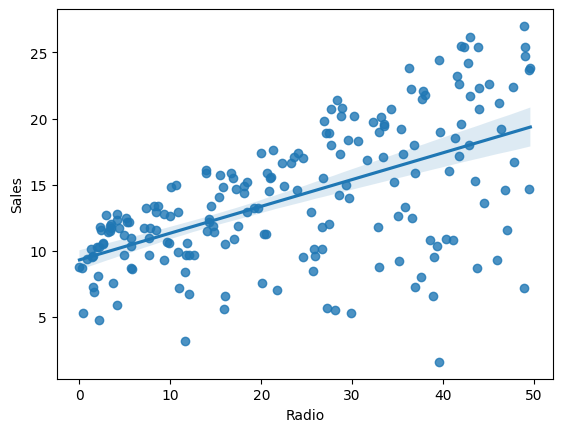

In [11]:
sns.regplot(x='Radio', y='Sales', data=advertising)

<Axes: xlabel='Newspaper', ylabel='Sales'>

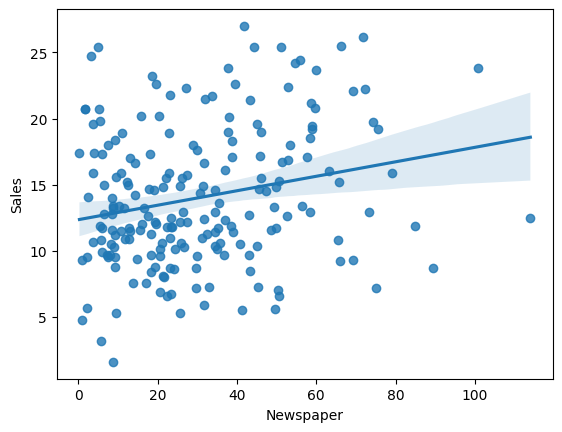

In [12]:
sns.regplot(x='Newspaper', y='Sales', data=advertising)

In [13]:
X = advertising.iloc[:,:-1]
Y = advertising.iloc[:,-1]

In [14]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
X_train

array([[-0.8814297 ,  1.56851374,  0.19562328],
       [ 0.18206797, -1.10371242, -0.8546056 ],
       [-1.70086527,  1.70986576,  2.15572787],
       [-1.71147667,  1.03676093,  0.97482535],
       [-0.9026525 , -1.52776846, -0.75781031],
       [-0.27775918, -1.1979471 ,  0.04075082],
       [-0.93802382, -0.43733864, -0.84976584],
       [ 1.61224833,  1.26561657,  1.00386394],
       [-1.57234948, -0.22867615, -0.6513355 ],
       [ 0.52634882, -1.34603016, -1.18854935],
       [ 1.54857995, -0.86812573, -1.16435052],
       [ 0.37661023, -0.16809671, -0.40934727],
       [-0.47230144, -0.41041445,  0.39405362],
       [-1.52282963,  0.78098109,  1.7153093 ],
       [ 1.62403877, -1.30564387, -1.06271547],
       [-1.57470757, -0.50464913, -0.39482798],
       [ 1.65823104,  0.28288352, -1.38697969],
       [-1.58296088, -0.76716001, -0.34159057],
       [-0.21998603, -1.25179548, -1.02399735],
       [-1.50160684,  1.04349198, -1.02399735],
       [-0.61968194, -0.93543621, -1.299

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [21]:
regression.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
from sklearn.model_selection import cross_val_score
validation_scores = cross_val_score(regression, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)


In [23]:
validation_scores

array([-4.02905542, -1.60349604, -2.1790918 , -2.8572684 , -4.53254457])

In [24]:
np.mean(validation_scores)

np.float64(-3.0402912441116)

In [25]:
y_pred = regression.predict(X_test)


In [26]:
y_pred

array([16.38348211, 20.92434957, 21.61495426, 10.49069997, 22.17690456,
       13.02668085, 21.10309295,  7.31813008, 13.56732111, 15.12238649,
        8.92494113,  6.49924401, 14.30119928,  8.77233515,  9.58665483,
       12.09485291,  8.59621605, 16.25337881, 10.16948105, 18.85753401,
       19.5799036 , 13.15877029, 12.25103735, 21.35141984,  7.69607607,
        5.64686906, 20.79780073, 11.90951247,  9.06581044,  8.37295611,
       12.40815899,  9.89416076, 21.42707658, 12.14236853, 18.28776857,
       20.18114718, 13.99303029, 20.89987736, 10.9313953 ,  4.38721626,
        9.58213448, 12.6170249 ,  9.93851933,  8.06816257, 13.45497849,
        5.25769423,  9.15399537, 14.09552838,  8.71029827, 11.55102817])

In [27]:
## Performance Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate the Mean Squared Error, R-squared, and Mean Absolute Error
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
# Display the performance metrics
print("Performance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Performance Metrics:
Mean Squared Error: 2.88002373009419
R-squared: 0.8935163320163659
Mean Absolute Error: 1.402312498938506
Root Mean Squared Error: 1.6970632663793621


In [28]:
adjusted_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

Adjusted R-squared: 0.886571744973955


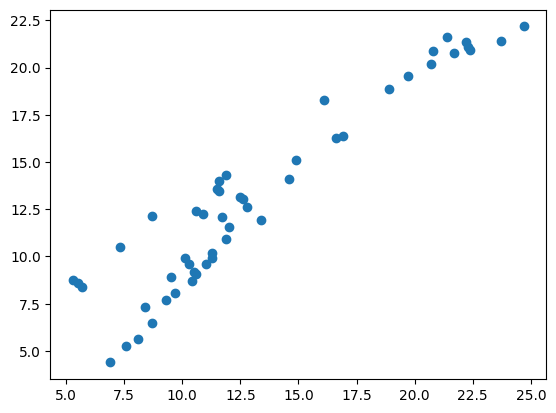

In [29]:
plt.scatter(Y_test, y_pred)

In [30]:
residuals = Y_test - y_pred
print("Residuals:", residuals)

Residuals: 95     0.516518
15     1.475650
30    -0.214954
158   -3.190700
128    2.523095
115   -0.426681
69     1.196907
170    1.081870
174   -2.067321
45    -0.222386
66     0.575059
182    2.200756
165   -2.401199
78    -3.472335
186    0.713345
177   -0.394853
56    -3.096216
152    0.346621
82     1.130519
68     0.042466
124    0.120096
16    -0.658770
148   -1.351037
93     0.848580
65     1.603924
60     2.453131
84     0.902199
67     1.490488
125    1.534190
132   -2.672956
9     -1.808159
18     1.405839
55     2.272923
75    -3.442369
150   -2.187769
104    0.518853
135   -2.393030
137   -0.099877
164    0.968605
76     2.512784
79     1.417866
197    0.182975
38     0.161481
24     1.631837
122   -1.854978
195    2.342306
29     1.346005
19     0.504472
143    1.689702
86     0.448972
Name: Sales, dtype: float64


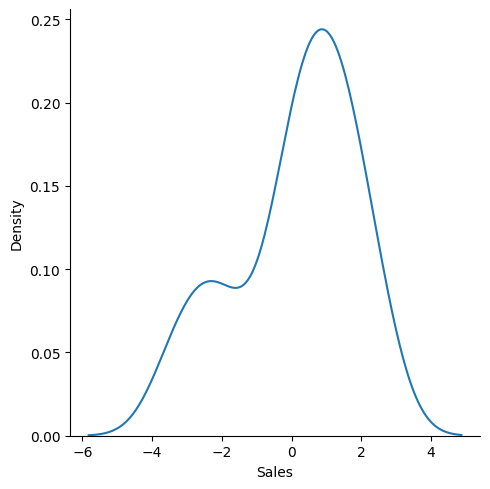

In [31]:
sns.displot(residuals, kind='kde')

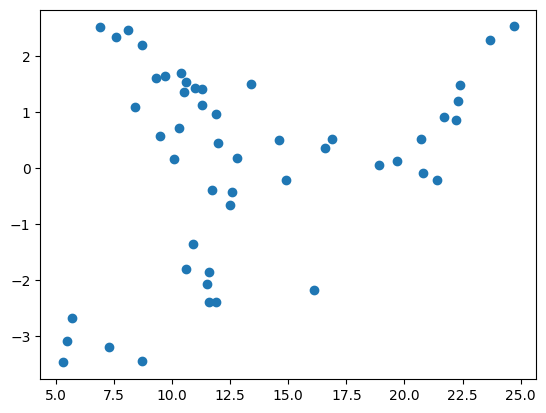

In [32]:
plt.scatter(Y_test, residuals)

In [35]:
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.104
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.673
Date:                Sun, 12 Oct 2025   Prob (F-statistic):                     0.00105
Time:                        13:57:03   Log-Likelihood:                         -612.94
No. Observations:                 150   AIC:                                      1232.
Df Residuals:                     147   BIC:                                      1241.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
regression.coef_

array([3.85342355, 2.84437918, 0.05306231])

In [37]:
print("Value for 100 TV, 20 Radio, and 30 Newspaper:", regression.predict(scaler.transform([[100, 20, 30]])))

Value for 100 TV, 20 Radio, and 30 Newspaper: [11.22783276]
